# G2M Insight for Cab Investment Firm

<span style="color: red">By: Serhat Uğur</span>

<span style="color: blue">Process Overview:

Data Examination and Correction:
I started by reviewing the dataset to identify and correct any issues. This involved addressing missing values, fixing any inconsistencies, and ensuring the data was in the right format for analysis.

Exploratory Data Analysis (EDA) and Visualization:
After cleaning the data, I explored it to understand the patterns and relationships between different variables. I used various visualizations, such as charts and graphs, to gain insights from the data and identify trends.

Hypothesis Testing:
Finally, I performed five different hypothesis tests to assess the significance of certain factors. These tests helped validate the patterns I observed and allowed me to make informed conclusions based on the data.</span>

In [68]:
# Below are the list of datasets which are provided for the analysis:

# Cab_Data.csv – this file includes details of transaction for 2 cab companies

# Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

# Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

# City.csv – this file contains list of US cities, their population and number of cab users

<span style="color: blue">Import Libraries</span>

In [69]:
import matplotlib.pyplot as plt 
from datetime import datetime
from scipy import stats
import seaborn as sns 
import pandas as pd

# 1-) Data Import and Examine

<span style="color: blue">Cab DataFrame</span>

In [70]:
cab_df = pd.read_csv('datasets/Cab_Data.csv')
cab_df.info()
# I will convert the Data of Travel datatype to datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [71]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


<hr style="border: 5px solid #ADD8E6;">


<span style="color: blue">City DataFrame</span>

In [72]:
df_city = pd.read_csv('datasets/City.csv')
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [73]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

<hr style="border: 5px solid #ADD8E6;">


<span style="color: blue">CustomerID DataFrame</span>

In [74]:
df_custID = pd.read_csv('datasets/Customer_ID.csv')
df_custID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [75]:
df_custID.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


<hr style="border: 5px solid #ADD8E6;">


<span style="color: blue">TransactionID DataFrame</span>

In [76]:
df_tranID = pd.read_csv('datasets/Transaction_ID.csv')
df_tranID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [77]:
df_tranID['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

# 2) Merge, Cleaning, Converts

In [78]:
df= cab_df.merge(df_tranID, on= 'Transaction ID').merge(df_custID, on ='Customer ID').merge(df_city, on = 'City')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [79]:
# I have converted the Date of Travel datatype from int64 to datetime format
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"], unit="D", origin="1899-12-30")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [80]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [81]:
df.duplicated().sum()

0

In [82]:
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [83]:
# In summary, there are no null or duplicates in the dataframes.

# 3) Exploratory Data Analysis (EDA)

In [84]:
data_corr = df.corr()
data_corr

C:\Users\PC\AppData\Local\Temp\ipykernel_25348\3628254647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


<hr style="border: 5px solid #ADD8E6;">


C:\Users\PC\AppData\Local\Temp\ipykernel_25348\2258230573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cab_df.corr()


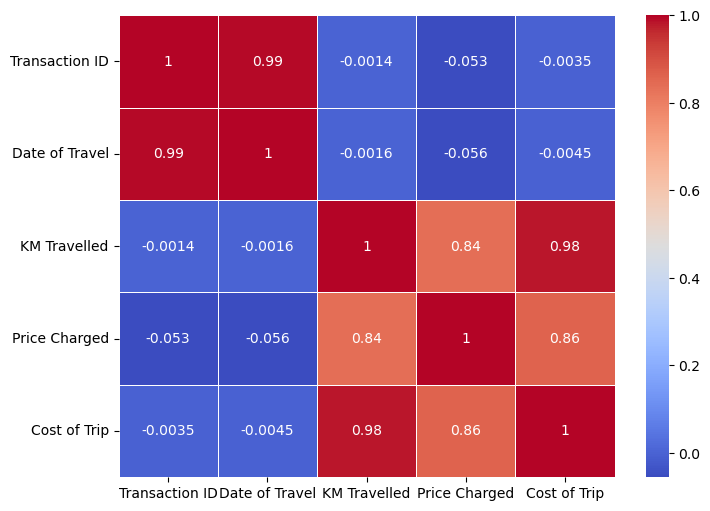

In [85]:
corr_matrix = cab_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

<hr style="border: 5px solid #ADD8E6;">


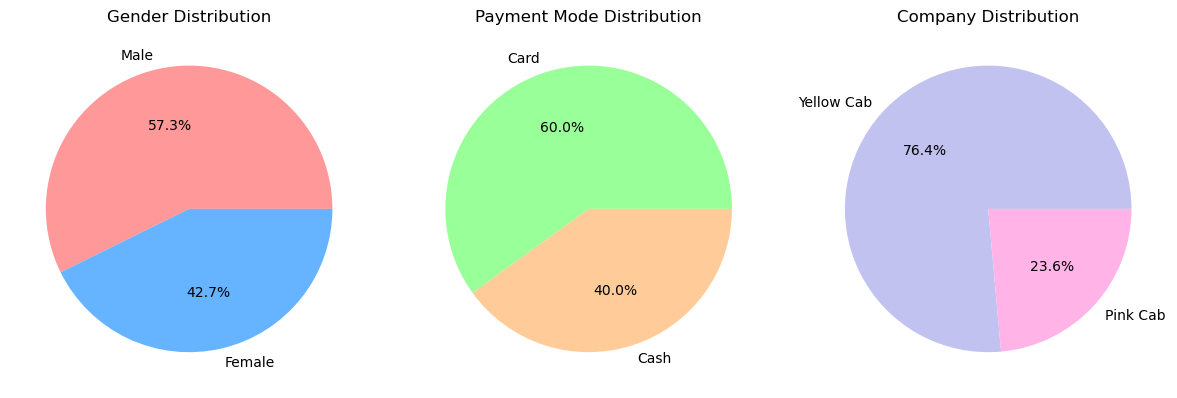

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

gender_counts = df['Gender'].value_counts()
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axs[0].set_title('Gender Distribution')
                        
payment_counts = df['Payment_Mode'].value_counts()
axs[1].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['#99ff99','#ffcc99'])
axs[1].set_title('Payment Mode Distribution')
                        
company_counts = df['Company'].value_counts()
axs[2].pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', colors=['#c2c2f0','#ffb3e6','#c2f0c2'])
axs[2].set_title('Company Distribution')
                        
plt.tight_layout()
plt.show()                    

<hr style="border: 5px solid #ADD8E6;">


In [87]:
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df["Profit"].head()

0     57.3150
1    281.2772
2    194.6480
3     23.6660
4    253.9808
Name: Profit, dtype: float64

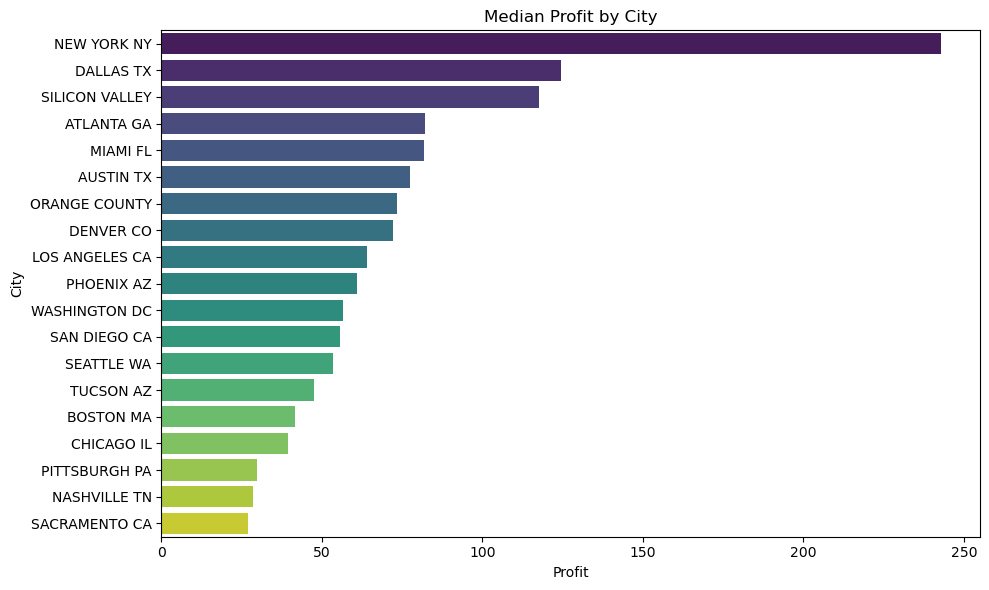

In [88]:
city_profit = df.groupby('City')['Profit'].median().reset_index()
city_profit = city_profit.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='City', data=city_profit, palette='viridis')

plt.title('Median Profit by City')
plt.xlabel('Profit')
plt.ylabel('City')

plt.tight_layout()
plt.show()


<hr style="border: 5px solid #ADD8E6;">


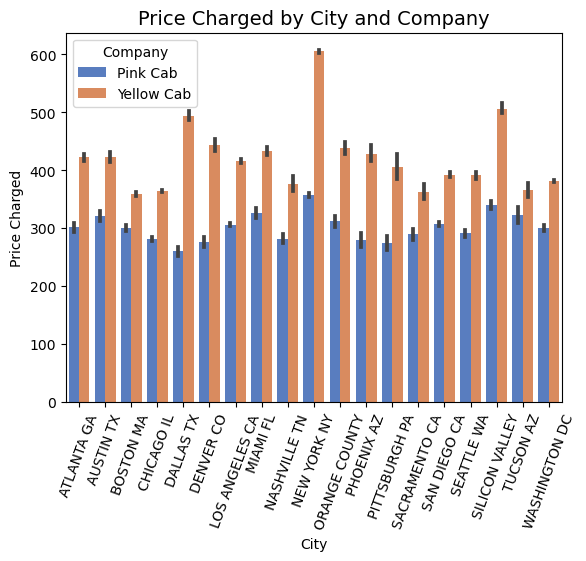

In [89]:
sns.barplot(data=df, x="City", y="Price Charged", hue='Company', palette="muted")

plt.xticks(rotation=70)
plt.title("Price Charged by City and Company", fontsize=14)

plt.show()

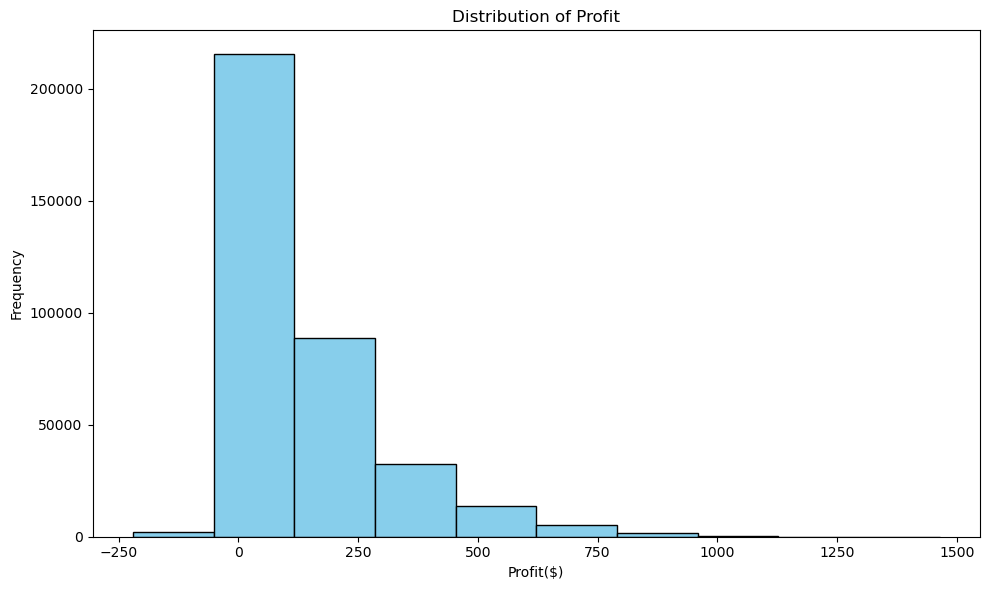

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of Profit')
plt.xlabel('Profit($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


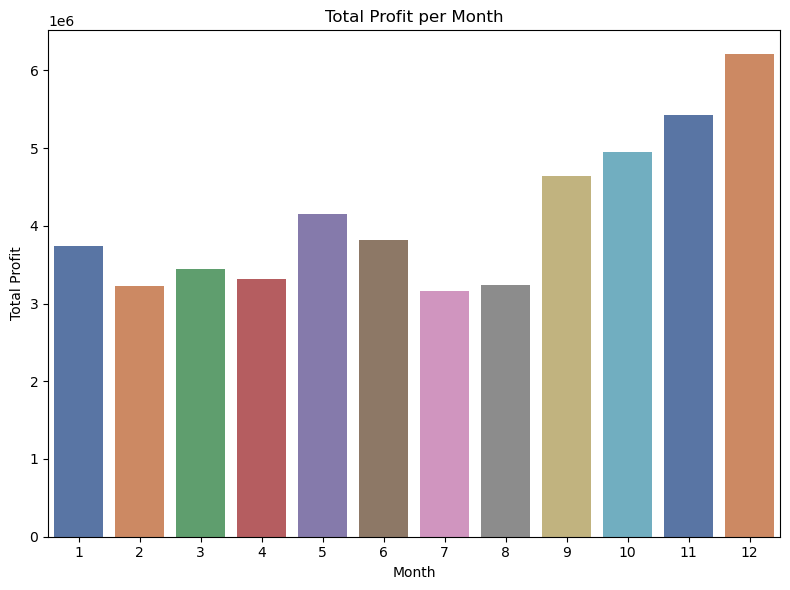

In [91]:
df['Month'] = pd.to_datetime(df['Date of Travel']).dt.month
profit_per_month = df.groupby('Month')['Profit'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Profit', data=profit_per_month, palette='deep')

plt.title('Total Profit per Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


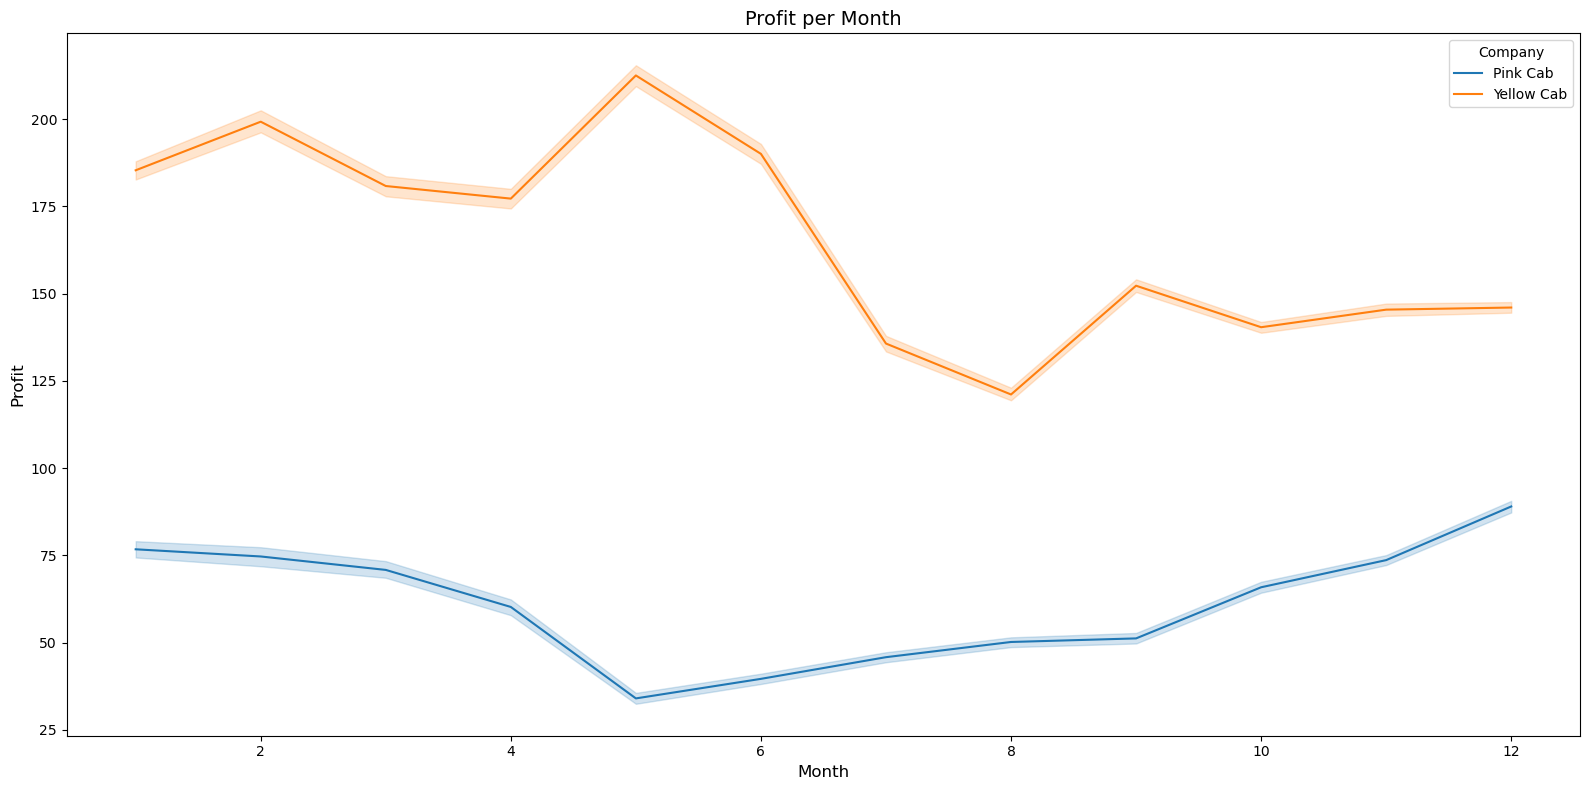

In [92]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df)

plt.xlabel("Month", size=12)
plt.ylabel("Profit", size=12)
plt.title("Profit per Month", size=14)

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


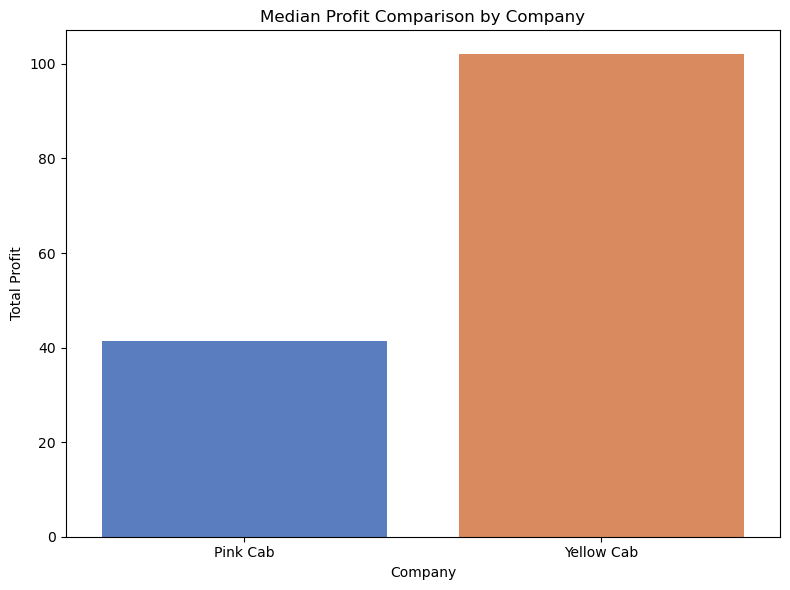

In [93]:
median_by_company = df.groupby('Company')['Profit'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Profit', data=median_by_company, palette='muted')

plt.title('Median Profit Comparison by Company')
plt.xlabel('Company')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


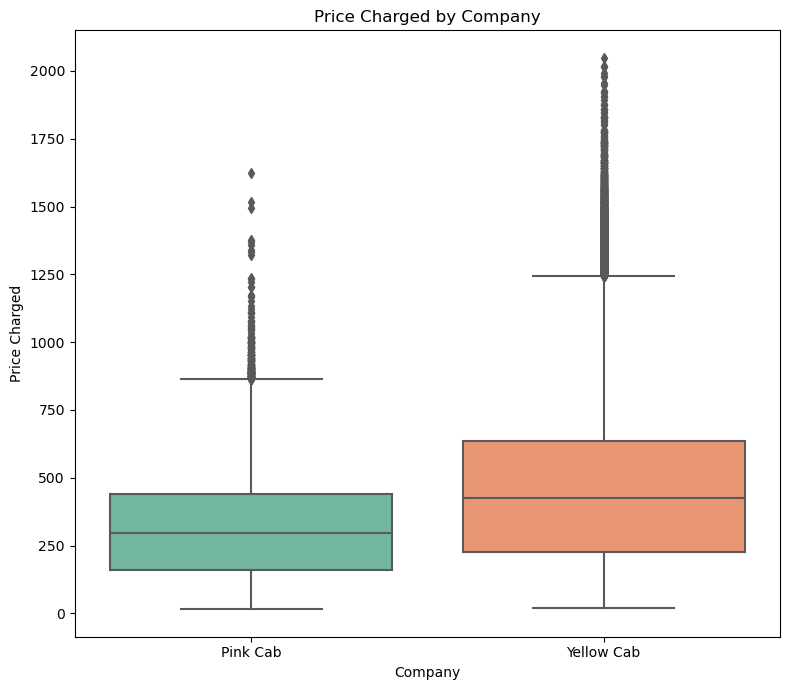

In [94]:
plt.figure(figsize=(8, 7))
sns.boxplot(x='Company', y='Price Charged', data=df, palette='Set2')

plt.title('Price Charged by Company')
plt.xlabel('Company')
plt.ylabel('Price Charged')

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


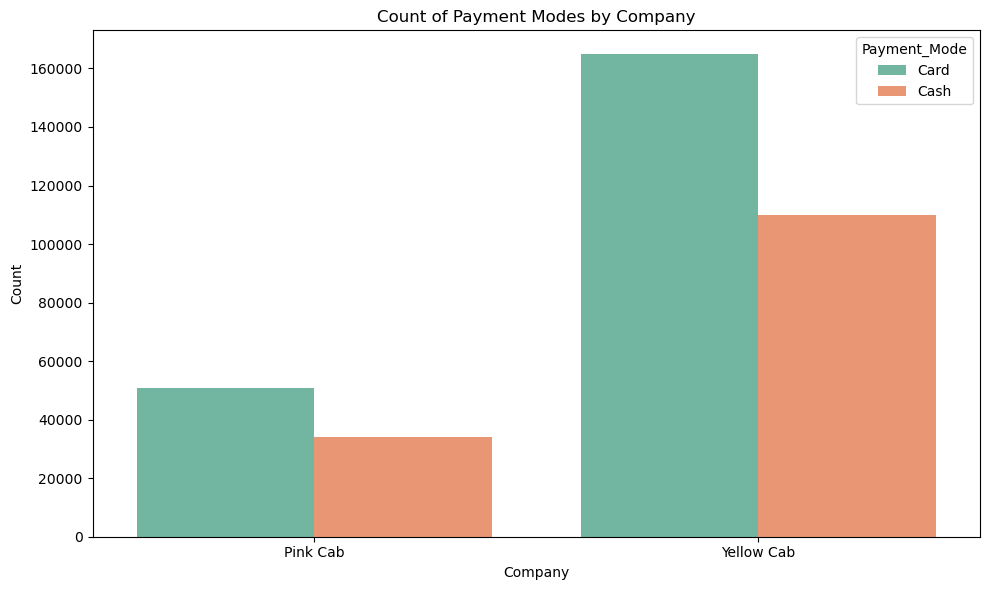

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Company', hue='Payment_Mode', data=df, palette='Set2')

plt.title('Count of Payment Modes by Company')
plt.xlabel('Company')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


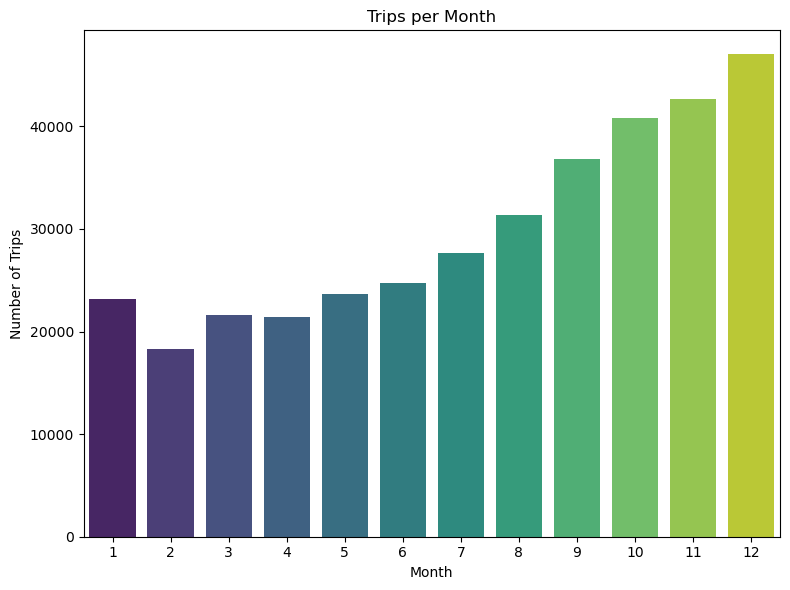

In [96]:
month_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(8, 6))

sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')

plt.title('Trips per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


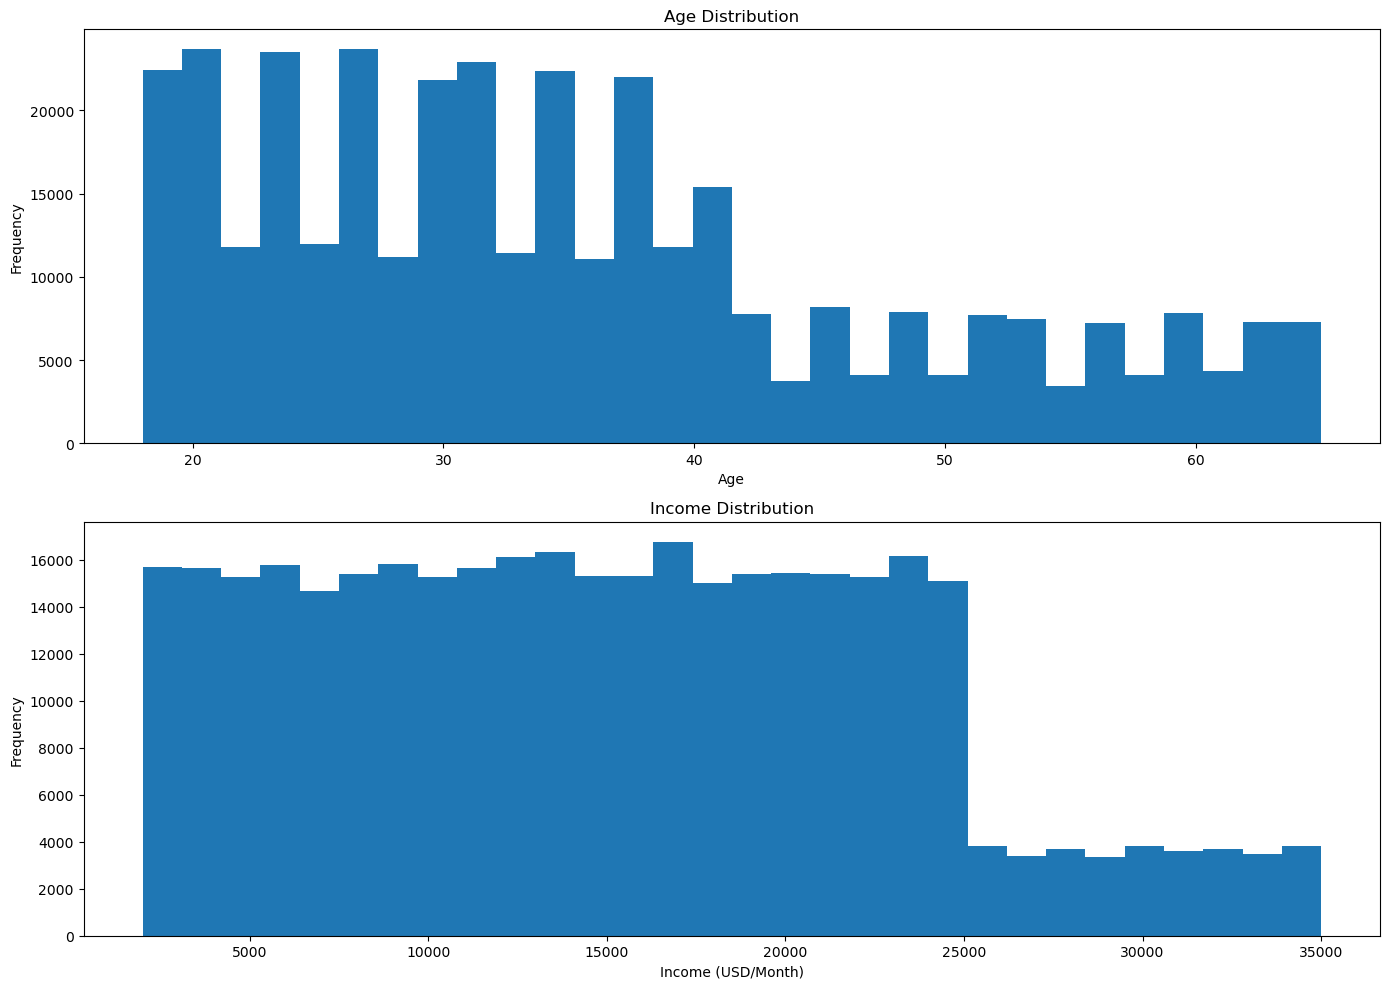

In [97]:
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

axs[0].hist(df["Age"], bins=30)
axs[0].set_title("Age Distribution")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Frequency")

axs[1].hist(df["Income (USD/Month)"], bins=30)
axs[1].set_title("Income Distribution")
axs[1].set_xlabel("Income (USD/Month)")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


The average age is: 35.34 years
The average income is: $15048.82 USD/Month


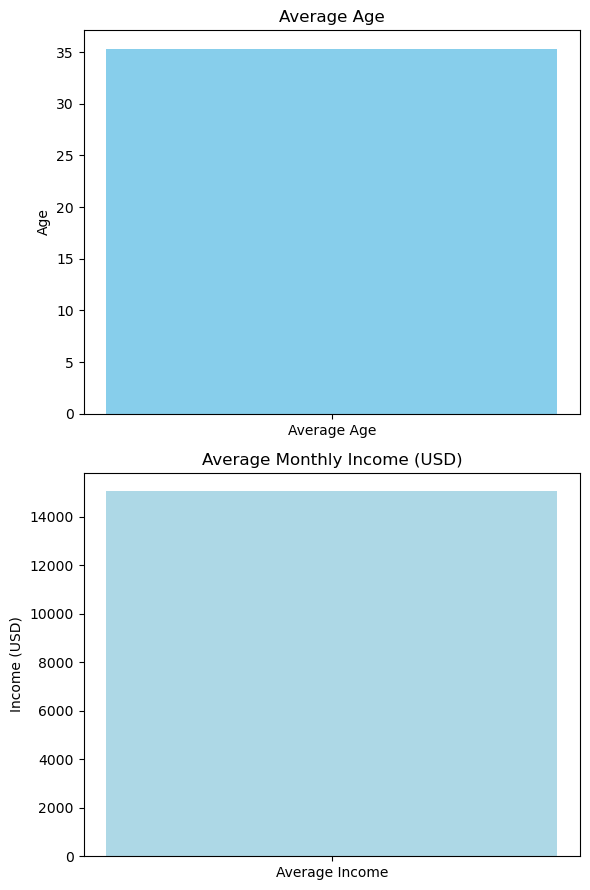

In [98]:
average_age = df['Age'].mean()
print(f"The average age is: {average_age:.2f} years")

average_income = df['Income (USD/Month)'].mean()
print(f"The average income is: ${average_income:.2f} USD/Month")

fig, axs = plt.subplots(2, 1, figsize=(6, 9))  

axs[0].bar(['Average Age'], [average_age], color='skyblue')
axs[0].set_title('Average Age')
axs[0].set_ylabel('Age')

axs[1].bar(['Average Income'], [average_income], color='lightblue')
axs[1].set_title('Average Monthly Income (USD)')
axs[1].set_ylabel('Income (USD)')

plt.tight_layout()
plt.show()

<hr style="border: 5px solid #ADD8E6;">


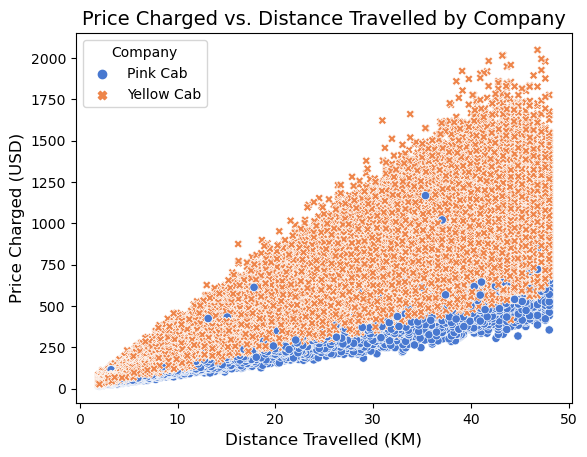

In [99]:
sns.scatterplot(data=df, x='KM Travelled', y='Price Charged', hue='Company', style='Company', palette='muted')  

plt.title('Price Charged vs. Distance Travelled by Company', fontsize=14)
plt.xlabel('Distance Travelled (KM)', fontsize=12)
plt.ylabel('Price Charged (USD)', fontsize=12)

plt.show()

# 4) Hypothesis

<span style="color: blue">First Hypothesis</span>

In [100]:
male_profit = df[df['Gender'] == 'Male']['Profit']
female_profit = df[df['Gender'] == 'Female']['Profit']

t_stat, p_value = stats.ttest_ind(male_profit, female_profit, equal_var=True)  

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average price charged between genders.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average price charged between genders.")

T-Statistic: 12.70131593950141
P-Value: 5.921884821314785e-37
Reject the null hypothesis: There is a significant difference in the average price charged between genders.


<hr style="border: 5px solid #ADD8E6;">


<span style="color: blue">Second Hypothesis</span>

In [101]:
median_income = df['Income (USD/Month)'].median()

high_income = df[df['Income (USD/Month)'] > median_income]['Price Charged']
low_income = df[df['Income (USD/Month)'] <= median_income]['Price Charged']

t_statistic, p_value = stats.ttest_ind(high_income, low_income)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average price charged between high-income and low-income customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average price charged between high-income and low-income customers.")

T-Statistic: 2.693123309037643
P-Value: 0.007078936645579943
Reject the null hypothesis: There is a significant difference in the average price charged between high-income and low-income customers.


<hr style="border: 5px solid #ADD8E6;">


<span style="color: blue">Third Hypothesis</span>

In [102]:
age_groups = df['Age'].unique()

profits_by_group = [df[df['Age'] == group]['Profit'] for group in age_groups]

f_statistic, p_value = stats.f_oneway(*profits_by_group)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in profit across different age groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in profit across different age groups.")

F-Statistic: 12.711330567262774
P-Value: 2.2868608096198007e-96
We reject the null hypothesis. There is a significant difference in profit across different age groups.


<hr style="border: 5px solid #ADD8E6;">


<span style="color: blue">Fourth Hypothesis</span>

In [103]:
correlation_coefficient, p_value = stats.pearsonr(df['KM Travelled'], df['Cost of Trip'])

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-Value: {p_value:.6f}")

if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between KM Travelled and Cost of Trip.")
else:
    print("We fail to reject the null hypothesis. There is no significant relationship between KM Travelled and Cost of Trip.")

Correlation Coefficient: 0.9818
P-Value: 0.000000
We reject the null hypothesis. There is a significant relationship between KM Travelled and Cost of Trip.


<hr style="border: 5px solid #ADD8E6;">


<span style="color: blue">Fifth Hypothesis</span>

In [104]:
payment_mode_card = df[df['Payment_Mode'] == 'Card']['Cost of Trip']
payment_mode_cash = df[df['Payment_Mode'] == 'Cash']['Cost of Trip']

t_statistic, p_value = stats.ttest_ind(payment_mode_card, payment_mode_cash)

print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.6f}")

if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the average cost of the trip between payment modes.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the average cost of the trip between payment modes.")

T-Statistic: 0.5385
P-Value: 0.590249
We fail to reject the null hypothesis. There is no significant difference in the average cost of the trip between payment modes.
